In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

## 1. Mô tả bộ dữ liệu bằng lệnh infor() và describe ().

In [8]:
df = pd.read_csv('Data/Credit_Scoring.csv', index_col=False)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0


In [11]:
df.shape

(149992, 11)

In [12]:
df.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149992 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 2   age                                   149992 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 4   DebtRatio                             149992 non-null  float64
 5   MonthlyIncome                         120262 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 7   NumberOfTimes90DaysLate               149992 non-null  int64  
 8   NumberRealEstateLoansOrLines          149992 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 10  NumberOfDependents                    146068 non-null  float64
dtype

In [10]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,1.202620e+05,149992.000000,149992.000000,149992.000000,149992.000000,146068.000000
mean,0.066837,6.048729,52.295516,0.421029,352.985824,6.669872e+03,8.452877,0.265981,1.018221,0.240399,0.757236
std,0.249740,249.762028,14.771902,4.192890,2037.824499,1.438414e+04,5.146006,4.169414,1.129704,4.155290,1.115103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029863,41.000000,0.000000,0.175075,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154162,52.000000,0.000000,0.366516,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559012,63.000000,0.000000,0.868292,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## 2. Phát hiện cột, dòng chứa dữ liệu khuyết thiếu

In [22]:
# những dòng có tồn tại NA
df[df.isna().any(axis = 1)]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
8,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
24,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0
33,0,0.072898,81,0,75.0,NaN,7,0,0,0,0.0
44,0,1.000000,62,0,0.0,NaN,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149968,0,0.000627,76,0,60.0,NaN,5,0,0,0,0.0
149969,0,0.236450,29,0,349.0,NaN,3,0,0,0,0.0
149976,0,0.037548,84,0,25.0,NaN,5,0,0,0,0.0
149984,0,0.871976,50,0,4132.0,NaN,11,0,1,0,3.0


## 3. Tiến hành xử lý dữ liệu thiếu khuyết

In [31]:
# 1. Tiến hành xóa
df2 = df.dropna()
print(f'Dữ liệu còn lại {(df2.shape[0] / df.shape[0]) * 100} %')
df2

Dữ liệu còn lại 80.17894287695344 %


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
5,1,0.964673,40,3,0.382965,13700.0,9,3,1,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...
149986,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149987,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149990,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [32]:
# 2. Vì dữ liệu liên tục nên chọn nội suy
df3 = df.interpolate(axis = 1)
df3

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.0,0.116951,27.0,0.0,46.000000,24.0,2.0,0.0,0.0,0.0,0.0
1,0.0,0.189169,57.0,0.0,0.606291,23684.0,9.0,0.0,4.0,0.0,2.0
2,0.0,0.644226,30.0,0.0,0.309476,2500.0,5.0,0.0,0.0,0.0,0.0
3,0.0,0.018798,51.0,0.0,0.531529,6501.0,7.0,0.0,2.0,0.0,2.0
4,0.0,0.010352,46.0,0.0,0.298354,12454.0,13.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
149987,0.0,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0
149988,0.0,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0
149989,0.0,0.246044,58.0,0.0,3870.000000,1944.0,18.0,0.0,1.0,0.0,0.0
149990,0.0,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

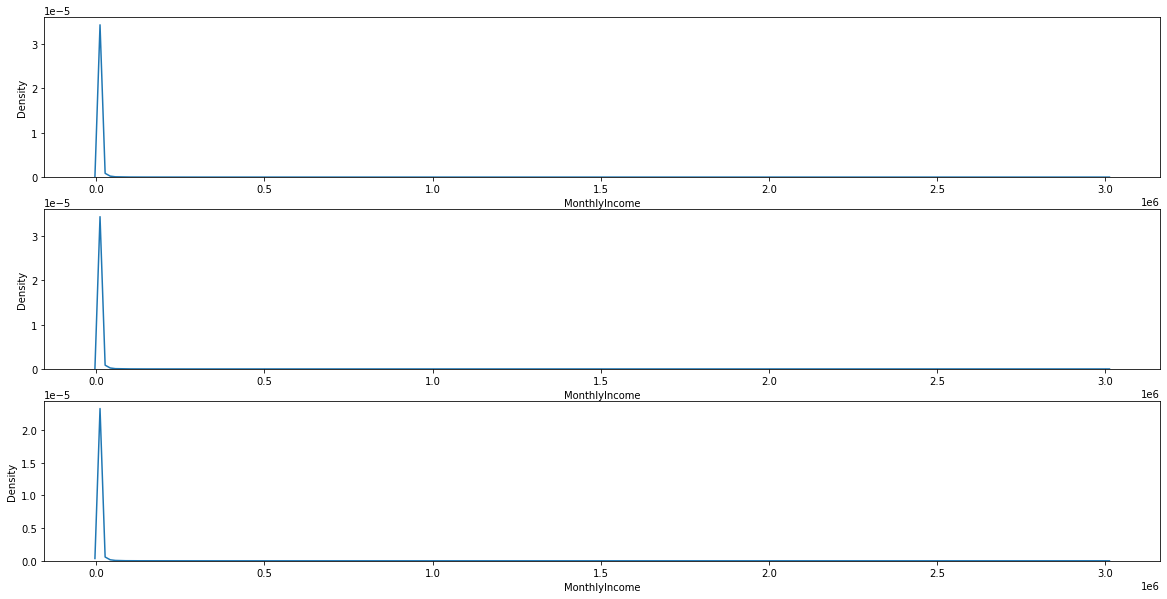

In [40]:
# 3. So sánh các phân bố của các thuộc tính sau khi đã xử lý dữ liệu khuyết thiếu

fig, ax = plt.subplots(nrows=3, figsize = (20,10))
sns.kdeplot(data=df['MonthlyIncome'], ax = ax[0])
sns.kdeplot(data=df2['MonthlyIncome'], ax = ax[1])
sns.kdeplot(data=df3['MonthlyIncome'], ax = ax[2])

## 4. Tiến hành xử lý dữ liệu ngoại lai : Dùng df nội suy

<AxesSubplot:xlabel='MonthlyIncome'>

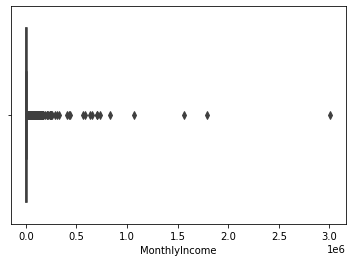

In [93]:
sns.boxplot(x = df3['MonthlyIncome'])

In [80]:
# Phát hiện ngoại lai dùng Z-score
z = np.abs(stats.zscore(df3))
df3_zscore = df3[(z<3).all(axis = 1)]
df3_zscore

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.0,0.116951,27.0,0.0,46.000000,24.0,2.0,0.0,0.0,0.0,0.0
1,0.0,0.189169,57.0,0.0,0.606291,23684.0,9.0,0.0,4.0,0.0,2.0
2,0.0,0.644226,30.0,0.0,0.309476,2500.0,5.0,0.0,0.0,0.0,0.0
3,0.0,0.018798,51.0,0.0,0.531529,6501.0,7.0,0.0,2.0,0.0,2.0
4,0.0,0.010352,46.0,0.0,0.298354,12454.0,13.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
149987,0.0,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0
149988,0.0,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0
149989,0.0,0.246044,58.0,0.0,3870.000000,1944.0,18.0,0.0,1.0,0.0,0.0
149990,0.0,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0


(0.0, 16000.0)

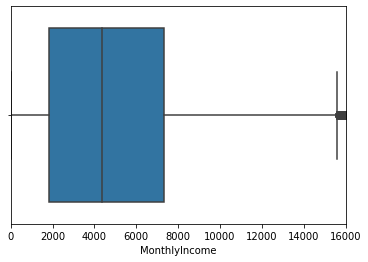

In [99]:
sns.boxplot(x = df3_zscore['MonthlyIncome'])
plt.xlim((0,16000))

In [88]:
df3_zscore.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,135922.0,135922.000000,135922.000000,135922.000000,135922.000000,135922.000000,135922.000000,135922.000000,135922.000000,135922.000000,135922.000000
mean,0.0,0.400641,52.677558,0.192301,304.267603,5205.007475,8.189587,0.050021,0.957005,0.041252,0.718456
std,0.0,7.361079,14.836986,0.587773,874.998574,4567.808753,4.566132,0.323846,0.929377,0.246274,1.082503
min,0.0,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.026648,42.000000,0.000000,0.171433,1854.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.131475,52.000000,0.000000,0.357928,4375.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.0,0.486949,63.000000,0.000000,0.843749,7350.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,0.0,747.000000,96.000000,12.000000,6464.000000,44574.000000,23.000000,12.000000,4.000000,9.000000,6.000000


In [82]:
# Phát hiện ngoại lai bằng IQR
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(q= 0.75)
IQR =  Q3 - Q1

df3_IQR = df3[~((df3 < (Q1 - 1.5*IQR)) | (df3 > (Q3 + 1.5*IQR))).any(axis = 1)]
df3_IQR

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
2,0.0,0.644226,30.0,0.0,0.309476,2500.0,5.0,0.0,0.0,0.0,0.0
3,0.0,0.018798,51.0,0.0,0.531529,6501.0,7.0,0.0,2.0,0.0,2.0
4,0.0,0.010352,46.0,0.0,0.298354,12454.0,13.0,0.0,2.0,0.0,2.0
7,0.0,0.548458,64.0,0.0,0.209892,11362.0,7.0,0.0,1.0,0.0,2.0
9,0.0,0.166284,53.0,0.0,0.188274,8800.0,7.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149986,0.0,0.385742,50.0,0.0,0.404293,3400.0,7.0,0.0,0.0,0.0,0.0
149987,0.0,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0
149988,0.0,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0
149990,0.0,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

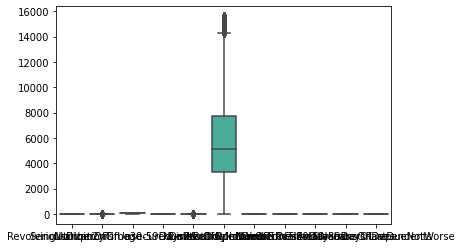

In [83]:
sns.boxplot(data = df3_IQR)

<AxesSubplot:xlabel='MonthlyIncome'>

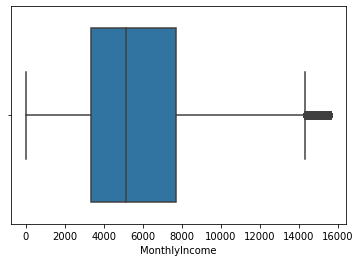

In [84]:
sns.boxplot(x = df3_IQR["MonthlyIncome"])

- Dữ liệu phân bố  đều hơn

In [85]:
df3.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,1.499920e+05,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000
mean,0.066837,6.048729,52.295516,0.421029,352.985824,5.514377e+03,8.452877,0.265981,1.018221,0.240399,0.758674
std,0.249740,249.762028,14.771902,4.192890,2037.824499,1.312206e+04,5.146006,4.169414,1.129704,4.155290,1.783443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029863,41.000000,0.000000,0.175075,1.928500e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154162,52.000000,0.000000,0.366516,4.393000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559012,63.000000,0.000000,0.868292,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,98.000000


## 5. Chuẩn hóa dữ liệu

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

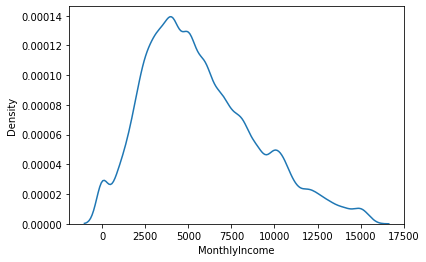

In [87]:
sns.kdeplot(data = df3_IQR['MonthlyIncome'])

In [ ]:
# tương tự 

## 6. Dùng skewness  để so sánh 2 cách loại bỏ outlier

In [103]:
skew_Zscore = skew(df3_zscore['MonthlyIncome'])
skew_IQR = skew(df3_IQR['MonthlyIncome'])
print(f'skew of Z-score {skew_Zscore}')
print(f'skew of IQR {skew_IQR}')

skew of Z-score 1.9518799361032575
skew of IQR 0.6566613606625293


- Trường hợp này thì IQR tốt hơn Z-score